<a href="https://colab.research.google.com/github/willcosta29/Projeto-analise-de-credito-em-sql/blob/main/Projeto_an%C3%A1lise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Distribuição de Clientes por Gênero**

```sql
SELECT
    sexo,
    COUNT(*) AS Contagem_de_Clientes,
    ROUND(CAST(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM credito) AS REAL), 2) AS Percentual
FROM
    credito
GROUP BY
    sexo
ORDER BY
    Contagem_de_Clientes DESC;

**Output**

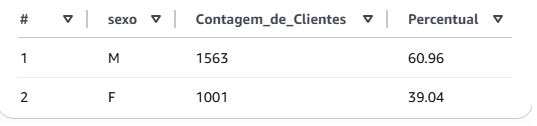

Insight: A base é majoritariamente Masculina (61%).

________________________________________________________________

Distribuição de Clientes por Faixa de Renda

```sql
SELECT
    salario_anual,
    COUNT(*) AS Contagem_de_Clientes,
    ROUND(CAST(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM credito) AS REAL), 2) AS Percentual
FROM
    credito
GROUP BY
    salario_anual
ORDER BY
    Contagem_de_Clientes DESC;

**Output**

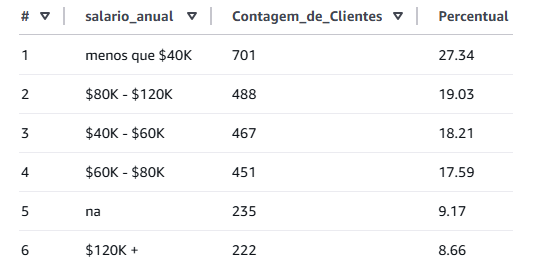

Esta query revela a segmentação financeira. O resultado mostra que a maior fatia (27,14%) dos clientes está na faixa de menor renda.

Alerta de Dados: A categoria na representa 9.17% da base, indicando uma falha na coleta de dados que limita análises mais precisas sobre risco e potencial de gasto

________________________________________________________________

Distribuição de Clientes por Escolaridade

```sql
SELECT
    escolaridade,
    COUNT(*) AS Contagem_de_Clientes,
    ROUND(CAST(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM credito) AS REAL), 2) AS Percentual
FROM
    credito
GROUP BY
    escolaridade
ORDER BY
    Contagem_de_Clientes DESC;

**Output**

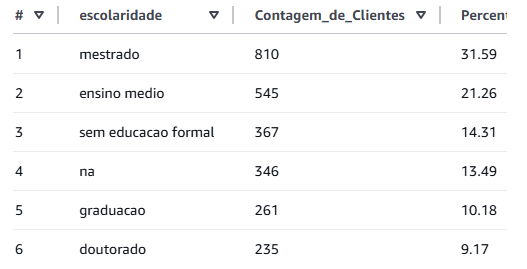

Insight: A maioria dos clientes tem mestrado (31.59%), ensino médio (21.26%) ou são não-educados (14.67%). A comunicação de produtos deve ser simplificada para atender a esse nível educacional, especialmente considerando os grupos com ensino médio ou menos.

________________________________________________________________

Storytelling do Relacionamento e Perfil de Crédito, quantificamos a maturidade da base e o perfil de crédito.

Resumo Estatístico da Idade

```sql
SELECT
    ROUND(AVG(idade), 2) AS Media_Idade,
    MIN(idade) AS Idade_Minima,
    MAX(idade) AS Idade_Maxima
FROM
    credito;

**Output**

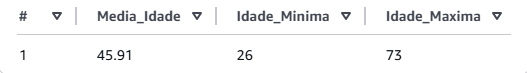

Insight: A idade média é de 46 anos, confirmando que a base é madura e estável.

________________________________________________________________

Distribuição por Categoria de Cartão

```sql
SELECT
    tipo_cartao,
    COUNT(*) AS Contagem_de_Clientes,
    ROUND(CAST(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM credito) AS REAL), 2) AS Percentual
FROM
    credito
GROUP BY
    tipo_cartao
ORDER BY
    Contagem_de_Clientes DESC;

**Output**

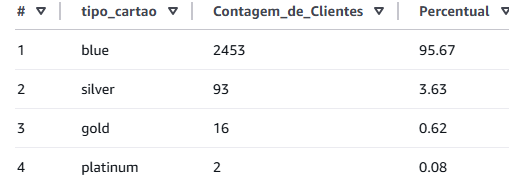

Insight: Quase 95% dos clientes possuem o cartão Blue (de entrada). Isso representa uma grande oportunidade de upgrade (Silver/Gold) para clientes com bom histórico.

________________________________________________________________

Resumo Estatístico do Limite de Crédito

```sql
SELECT
    ROUND(AVG(limite_credito), 2) AS Media_Limite_Credito, -- CORRIGIDO: Removido o acento
    MIN(limite_credito) AS Limite_Minimo,
    MAX(limite_credito) AS Limite_Maximo,
    SUM(CASE WHEN limite_credito < 5000 THEN 1 ELSE 0 END) AS Clientes_Limite_Baixo_Menor_5k
FROM
    credito;

**Output**

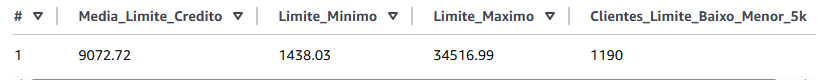

Insight: Embora o limite médio seja alto ($9072.72), a distribuição é concentrada em limites baixos. 1090 clientes (cerca de 42%) possuem limites inferiores a $5.000, reforçando a estratégia de focar em clientes de entrada.

________________________________________________________________

Storytelling da Atividade e Uso do Produto

Analisei o comportamento transacional do cliente e o risco de churn (abandono).

Resumo Estatístico da Qtd. de Transações

```sql
SELECT
    ROUND(AVG(qtd_transacoes_12m), 2) AS Media_Qtd_Transacoes,
    MIN(qtd_transacoes_12m) AS Min_Qtd_Transacoes,
    MAX(qtd_transacoes_12m) AS Max_Qtd_Transacoes
FROM
    credito;

**Output**

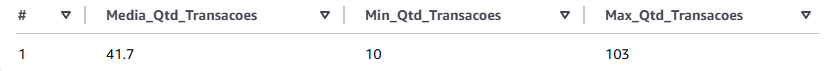

Insight: A média de transações é de 41 por ano. O cliente típico é moderadamente ativo, mas há espaço para aumentar essa frequência.

________________________________________________________________

Distribuição de Clientes por Meses Inativo

```sql
SELECT
    meses_inativo_12m,
    COUNT(*) AS Contagem_de_Clientes,
    ROUND(CAST(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM credito) AS REAL), 2) AS Percentual
FROM
    credito
GROUP BY
    meses_inativo_12m
ORDER BY
    Contagem_de_Clientes DESC;

**Output**

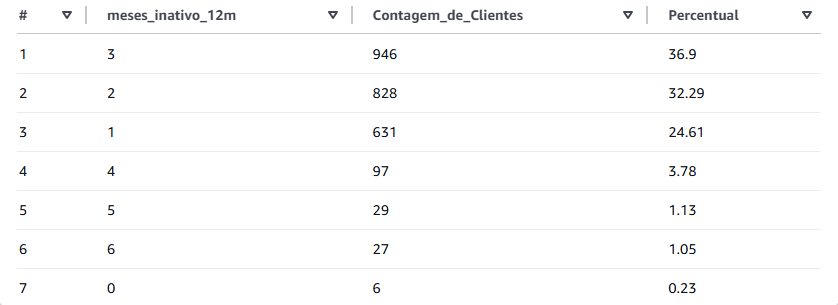

Insight: O maior grupo de clientes (36.9%) apresenta 3 meses de inatividade no último ano. Esse é o principal indicador de risco de churn e deve ser o foco das campanhas de retenção.

________________________________________________________________

Resumo Estatístico do Saldo Rotativo

```sql
SELECT
    ROUND(AVG(valor_transacoes_12m), 2) AS Media_Valor_Transacoes,
    MIN(valor_transacoes_12m) AS Min_Valor_Transacoes,
    MAX(valor_transacoes_12m) AS Max_Valor_Transacoes
FROM
    credito;

**Output**

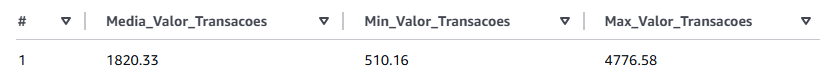

Insight: O valor médio de transações nos últimos 12 meses é baixo ($1.821,33). A vasta maioria dos clientes (quase 99%) possui um valor de transação acima de zero, indicando que a base tem um excelente perfil de pagamento (baixo risco), mas a empresa depende pouco da receita gerada pelo volume de transações.

________________________________________________________________

Storytelling Final: O Retrato do Cliente e Oportunidades Estratégicas
Com base nos dados extraídos via SQL, o Cliente Típico da base é:

Demografia: Homem (61%), com idade média de 46 anos, com renda abaixo de $40K (27.34%) e nível educacional de Ensino Médio ou menos (35.57%).

Crédito: Possui um Cartão Blue (95.67%) com limite baixo (42% abaixo de $5.000).

Comportamento: É um bom pagador (baixo uso de rotativo) e tem uma atividade moderada (média de 41 transações/ano).

Oportunidades de Negócio (Plano de Ação):

Retenção (Risco): O maior risco é o churn, com 21.37% dos clientes registrando 3 meses de inatividade.

Ação: Lançar campanhas de reengajamento focadas (ofertas personalizadas, benefícios) assim que o cliente atingir 2 meses de inatividade.

Rentabilidade (Upgrade): A base é quase totalmente Cartão Blue.

Ação: Segmentar clientes Blue com bom comportamento (alto uso de transações e baixo rotativo) e idade madura (40+), oferecendo um upgrade proativo para categorias Silver/Gold, aumentando o limite para incentivar o uso e gerar maior receita de anuidade/intercâmbio.

Qualidade de Dados: O grande volume de dados na em Renda e Escolaridade prejudica a modelagem.

Ação: Implementar validações de dados e incentivos para que os clientes forneçam as informações de renda e escolaridade.